In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [28]:
veri = pd.read_csv("olimpiyatlar_temizlenmis_20220204.csv")
veri.head()

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [29]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      39783 non-null  object 
 1   Gender    39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


In [30]:
veri.columns

Index(['Name', 'Gender', 'yas', 'boy', 'kilo', 'takim', 'uok', 'yil', 'sezon',
       'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')

# sütun isimlerini değiştirme

In [31]:
#örnek olması için ilk üç sütunu değiştirdim, csv dosyası düzenlenilip paylaşılmış.
veri.rename(columns={'isim'     : 'Name',
                     'cinsiyet' : 'Gender',
                     'Age'      :  'yas'}, inplace=True) #(inplace= True) anlamı, ismi değiştirilen kelimenin direkt üstüne yazılmasını sağlar.

# Sütun Çıkarma

In [32]:
#sütun çıkarma örneği aşağıda yazdığım gibidir. paylaşıla dosya değiştiği için hata veriyor.
#veri = veri.drop(["id","oyunlar"], axis=1) #(axis = 1) sütun demektir

In [33]:
veri.head()

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


# Boy ve Kilo Sütunu Kayıp Veri Doldurma

In [34]:
essiz_etkinlik = pd.unique(veri.etkinlik)
print(len(essiz_etkinlik))
essiz_etkinlik[:10] #baştan 10 tanesini verir

756


array(["Tug-Of-War Men's Tug-Of-War",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Ice Hockey Men's Ice Hockey",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Pommelled Horse", "Alpine Skiing Men's Super G",
       "Alpine Skiing Men's Giant Slalom"], dtype=object)

In [35]:
# Her bir etkinliği iteratif olarak dolaş
# Etkinlik özelinde boy ve kilo ortalamalarını hesapla
# Etkinlik özelinde kayıp boy ve kilo değerlerini etk. ort. eşitle

veri_gecici = veri.copy() # gerçek veri bozulmaması için kopyasını oluşturduk.
boy_kilo_liste  = ["boy", "kilo"]

for e in essiz_etkinlik: #Liste içerisinde dolaşacağım
    #etkinlik filtresi oluşturalım
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]

    #boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #eğer etlinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: #eğer etkinlik özelinde ortalama varsa ortalamayı hesapla
            tüm_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tüm_veri_ortalamasi)
    #etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, veri_gecici'ye eşitleyelim
    veri_gecici[etkinlik_filtre] = veri_filtreli

#kayıp değerleri gidelilmiş olan geçici veriyi gerçek veriye eşitle
veri = veri_gecici.copy()
veri.info() #boy ve kilo sütunlarında kayıp değer sayısına bakalım



C:\Users\emreu\AppData\Local\Temp\ipykernel_23408\4067033201.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      39783 non-null  object 
 1   Gender    39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


In [36]:
# yaş değişkeninde tanımlı olmayan değerleri bulacağız.
# "tilda" işareti ile yaş değişkeni tanımlı olanlar bulunacak


yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("yas ortlamasi: {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()


yas ortlamasi: 25.92
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      39783 non-null  object 
 1   Gender    39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


In [37]:
# madalya alamayan sporculari veri setinden cikaracagiz
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

0

In [38]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)
veri = veri[madalya_degiskeni_filtresi]
veri.head()

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [39]:
veri.to_csv("olimpiyatlar_temizlenmis_20220204.csv", index=False)

In [40]:
#öncelikli olarak histogram grafiklerini çizdireceğimiz fonksiyon yazma
def plotHistogram(degisken):
    """""
        girdi   : degisken/sütun ismi
        çikti   : ilgili değişkenin histogrami 
    """""
    
    plt.figure()
    plt.hist(veri[degisken],bins = 85, color="orange")
    plt.xlabel(degisken)
    plt.ylabel("frekans")
    plt.title("Veri sikligi - {}".format(degisken))
    plt.show()




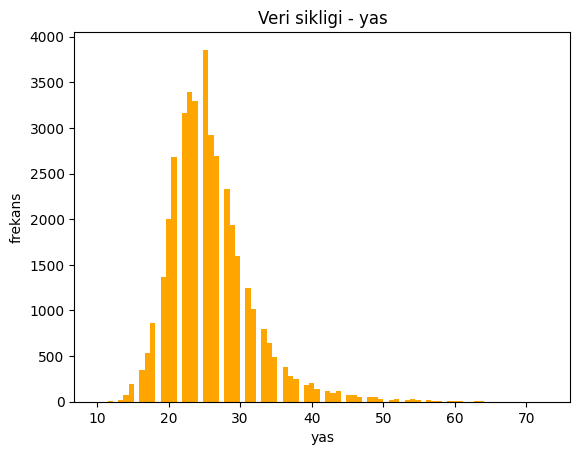

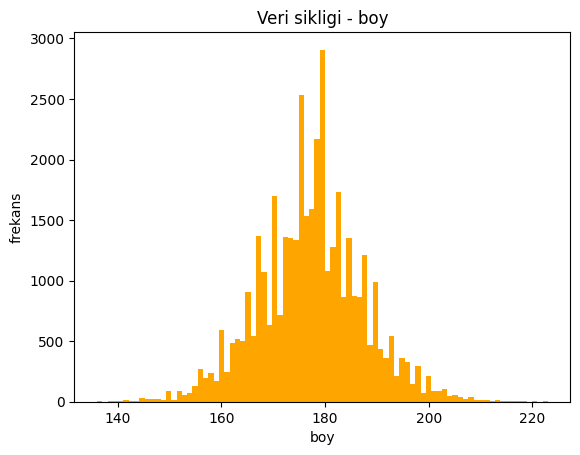

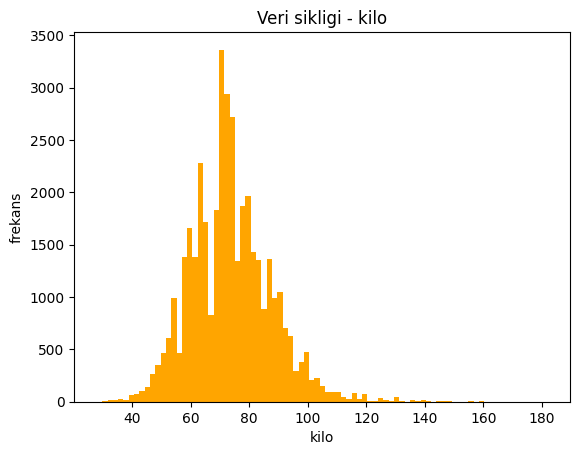

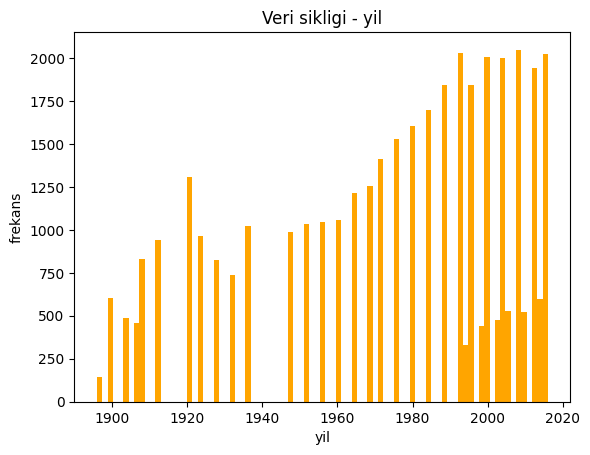

In [41]:
# Tüm sayısal değişkenler için histogramları çizdirelim
Sayisal_degisken = ["yas","boy","kilo","yil"]
for i in Sayisal_degisken:
    plotHistogram(i)

In [42]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


In [43]:

def plotBar(degisken, n = 5):
    """
    Girdi : Degişken / süten ismi
        n = Gösterilecek eşsiz değer sayisi
    Çikti: çubuk grafigi
    """
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color= "orange")
    plt.xticks(veri_sayma.index)
    plt.xticks(rotation= 45)
    plt.ylabel("frekans")
    plt.title("veri Sıklığı - {}".format(degisken))
    plt.show

    print("{}: \n".format(degisken,veri_sayma))


Name: 

Gender: 

takim: 

uok: 

sehir: 

spor: 

etkinlik: 

madalya: 



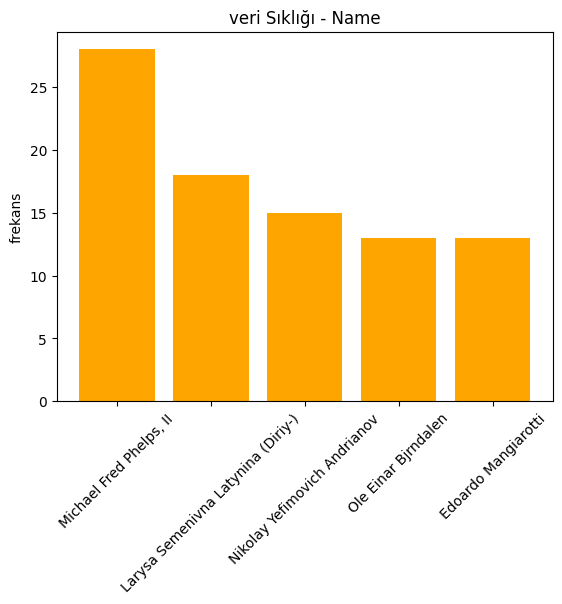

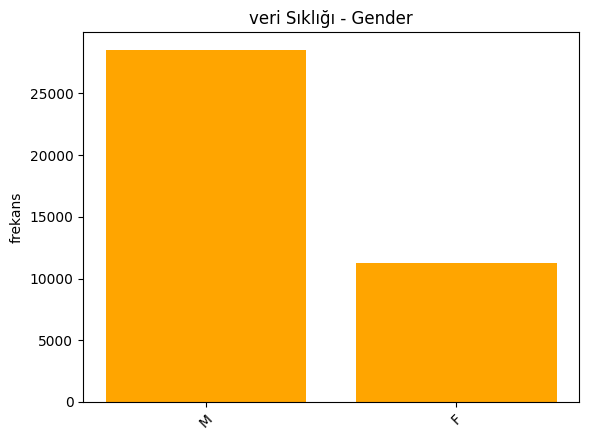

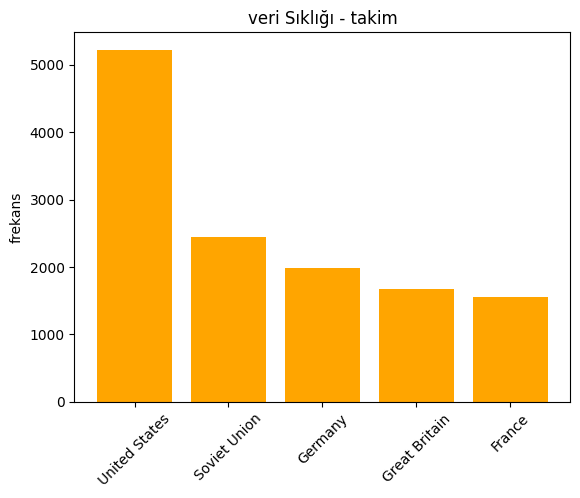

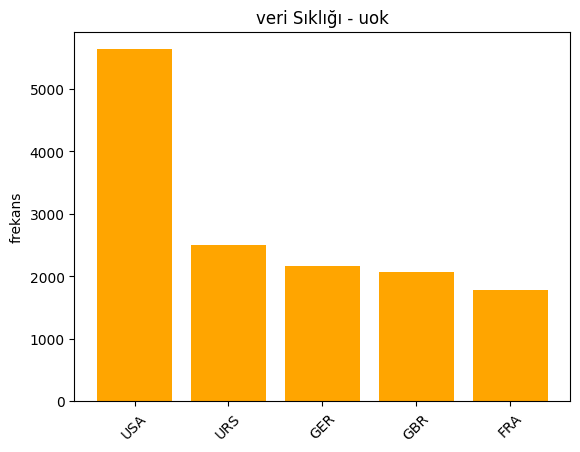

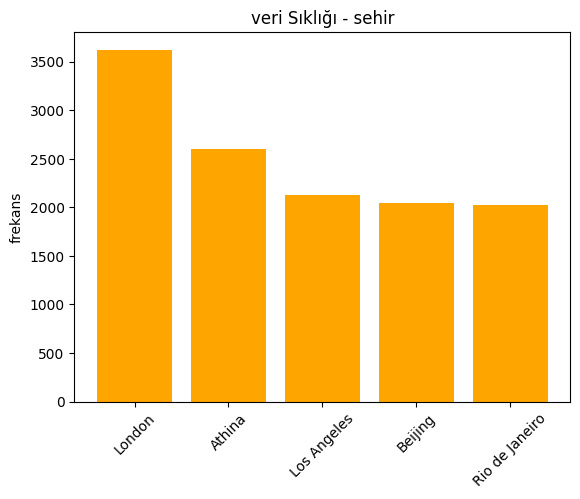

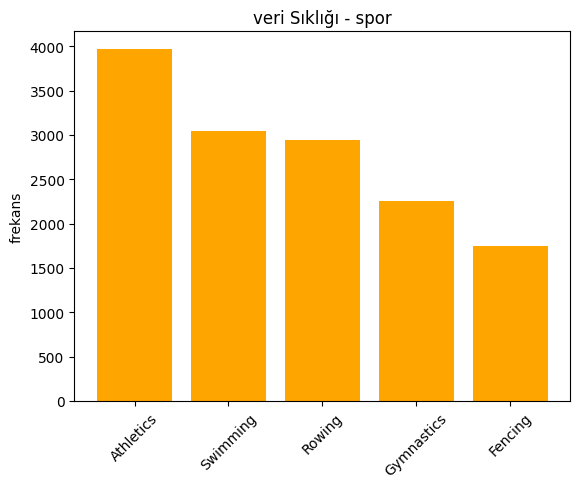

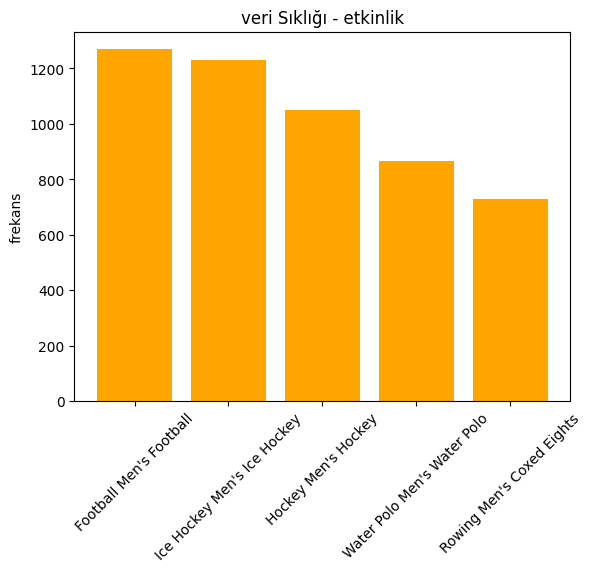

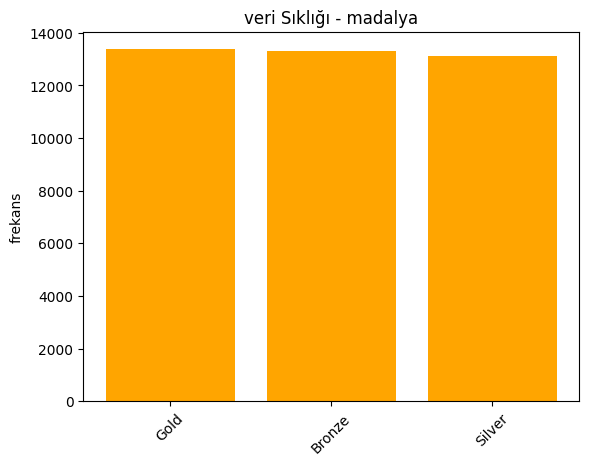

In [44]:
kategorik_degisken = ["Name","Gender","takim","uok","sehir","spor","etkinlik","madalya"]
for i in kategorik_degisken:
    plotBar(i)

# iki değişkenli veri analizi

In [45]:
#cinsiyete göre boy ve ağırlık karşılaştırılması
erkek = veri[veri.Gender == "M"]
erkek.head(3)
kadin = veri[veri.Gender == "F"]
kadin.head(3)

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
17,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
19,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
21,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


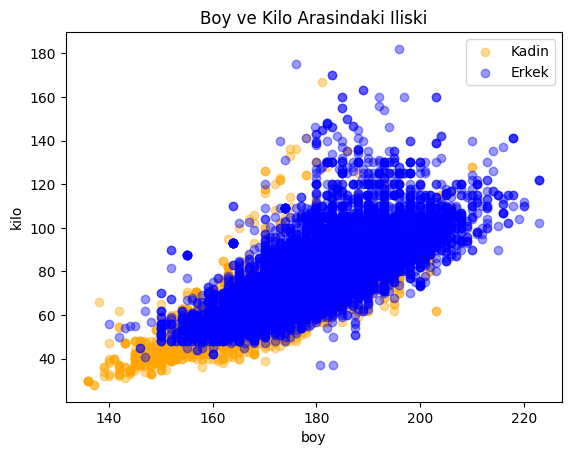

In [46]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha=0.4, label="Kadin",color="orange") #alpha, transparan çizmeye yarar
plt.scatter(erkek.boy, erkek.kilo, alpha=0.4, label= "Erkek", color="blue")
plt.xlabel("boy")
plt.ylabel("kilo")
plt.title("Boy ve Kilo Arasindaki Iliski")
plt.legend()
plt.show()

# sayisal sütünlar arasin iliski incelemesi

In [47]:
veri.loc[:,["yas","boy","kilo"]].corr() #bütün sütunlar, belirtilen satırlar, korelasyon tablosu.


,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


# madalya ve yas arasindaki iliski

In [48]:
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=['madalya']) #kontrol amacı ile kullanılabilir, belirtilen stünları parçaya ayırı
veri_gecici.head(2)

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False


In [49]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


# takımların kazandıkları altın, gümüş ve bronz madalya sayıları

In [50]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"], as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


# kazanılan madalyaların hangi sehirde kazanıldıgı

In [51]:
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"], as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


# Cinsiyete göre madalya 

In [52]:
veri_gecici[["Gender","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["Gender"], as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,Gender,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


# Çok Degiskenli Veri Analizi (pivot tablo)

In [53]:
veri_pivot = veri.pivot_table(index="madalya",columns="Gender"
                              ,values=["boy","kilo","yas"],
                              aggfunc={"boy": np.mean,
                                       "kilo":np.mean,
                                       "yas":[min,max,np.std]}) 
veri_pivot.head()

C:\Users\emreu\AppData\Local\Temp\ipykernel_23408\3095130474.py:1: FutureWarning: The provided callable <function mean at 0x000001E76F2EB010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  veri_pivot = veri.pivot_table(index="madalya",columns="Gender"
C:\Users\emreu\AppData\Local\Temp\ipykernel_23408\3095130474.py:1: FutureWarning: The provided callable <function mean at 0x000001E76F2EB010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  veri_pivot = veri.pivot_table(index="madalya",columns="Gender"
C:\Users\emreu\AppData\Local\Temp\ipykernel_23408\3095130474.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. 

boy                   kilo              yas                    \
               mean                   mean              max         min         
Gender            F           M          F          M     F     M     F     M   
madalya                                                                         
Bronze   170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0  10.0   
Gold     170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0  13.0   
Silver   170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0  13.0   

                             
              std            
Gender          F         M  
madalya                      
Bronze   5.329229  5.870340  
Gold     5.219615  5.987807  
Silver   5.253111  6.098221

# Anomali tespiti

In [54]:
#bard
def anomaliTespiti(df, ozellik):
    outlier_indices = []
    for c in ozellik:
        #1. çeyrek
        Q1 = np.percentile(df[c],25) #yüzdelik fonksiyonu
        #3. çeyrek
        Q3 = np.percentile(df[c],75)
        # IQR = Inter Quartile Range
        IQR = Q3 - Q1
        # aykırı deger için ek adim miktari
        outlier_step = 1.5 * IQR
        #aykiri degeri ve bulundugu indeksi tespit edelim
        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        #tespit edilen indesleri depolayalim
        outlier_indices.extend(outlier_list_col)

    #essiz aykiri degerleri bulalim
    outlier_indices = Counter(outlier_indices)
    #eger bir örnek v adet sütunda farkli deger ise bunu aykiri kabul edelim
    multiple_outliers = list(i for i, v in outlier_indices.items()if v > 1)

    return multiple_outliers

In [55]:
veri_anomali = veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

spor
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64

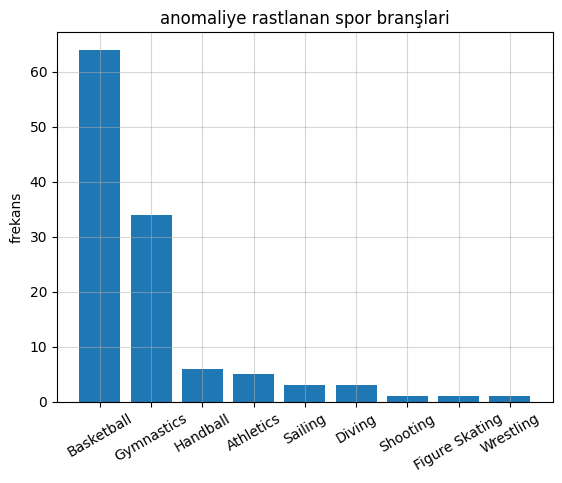

In [56]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation= 30)
plt.title("anomaliye rastlanan spor branşlari")
plt.ylabel("frekans")
plt.grid(True, alpha = 0.5)
plt.show()

In [57]:
veri_basket = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basket

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
1086,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
1087,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
2848,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
2849,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
3465,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39644,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
39645,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
39646,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
39736,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [58]:
veri_basket.etkinlik.value_counts()

etkinlik
Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: count, dtype: int64

In [59]:
#orijinal veri bozulmaması için kopyalanır.
veri_zaman = veri.copy()
veri_zaman.head(3)

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [60]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar


array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

# yıllara gore siralama

In [61]:
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

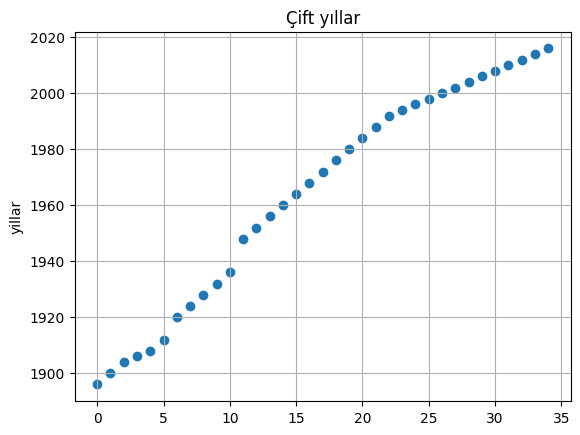

In [62]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("yillar")
plt.title("Çift yıllar")
plt.show()

In [63]:
# veri içerisinde bulunan yil degerlerini datetime veri tipine donusturme
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yil"],format = '%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


0   1900-01-01
1   1920-01-01
2   1920-01-01
Name: yil, dtype: datetime64[ns]

In [64]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [65]:
# veri zaman değişkeninin ana index'ini, datetime tipi olan tarih_Saat değerine güncelleme
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1, inplace=True)
veri_zaman

,Name,Gender,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


# Yillara göre ortalama yas, boy ve kilo degisimi

In [74]:
# 2 yıllık periyotlar halinde ortalama degerleri alalım
periyodik_veri = veri_zaman.resample("2A").mean("2A") #bard
periyodik_veri.head()


,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [75]:
# kayıp verileri çıkaralım
periyodik_veri.dropna(axis=0, inplace=True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

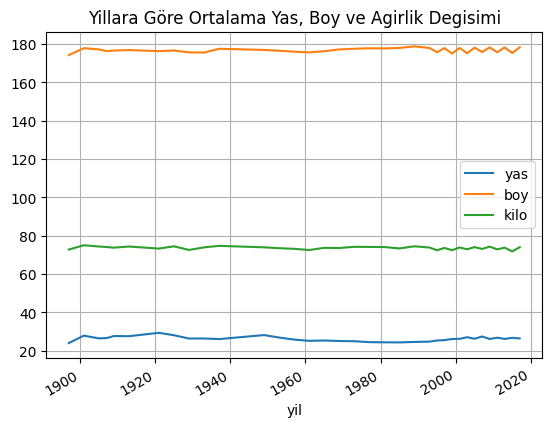

In [89]:
plt.figure()
periyodik_veri.plot()
plt.title("Yillara Göre Ortalama Yas, Boy ve Agirlik Degisimi")
plt.xlabel("yil")
plt.grid(True)
plt.show()

In [90]:
veri_zaman = pd.get_dummies(veri_zaman, columns=['madalya'])
veri_zaman.head(3)

,Name,Gender,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,True,False,False


In [92]:
periyodik_veri = veri_zaman.resample("2A").sum()
periyodik_veri.head()
# kayip verileri çıkarma
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,Name,Gender,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2008-12-31,Ragnhild Margrethe AamodtJos Luis Abajo GmezMa...,FMFMMMMFMFFMFMMFMMFFMMFMFFMMMMMMMMMMMFMFMMMMFF...,53344.0,365157.91,152090.92,NorwaySpainRussiaBelarusFranceFranceAustraliaU...,NORESPRUSBLRFRAFRAAUSUSATJKTURRUSFRAROUARGCUBN...,SummerSummerSummerSummerSummerSummerSummerSumm...,BeijingBeijingBeijingBeijingBeijingBeijingBeij...,HandballFencingAthleticsCanoeingHandballHandba...,"Handball Women's HandballFencing Men's epee, I...",710,671,667
2010-12-31,"Richard ""Richy"" AdjeiMeghan Christina Agosta ...",MFMMMMFFFFMMFFMFMMMFFFFFMFMFMFFMMFFFFFMMMFFFMM...,13896.0,91395.00,37877.12,Germany-2CanadaSwitzerlandSwitzerlandCanadaGer...,GERCANSUISUICANGERGERFRACANJPNUSAFINUSAFRANORC...,WinterWinterWinterWinterWinterWinterWinterWint...,VancouverVancouverVancouverVancouverVancouverV...,BobsleighIce HockeySki JumpingSki JumpingSnowb...,Bobsleigh Men's TwoIce Hockey Women's Ice Hock...,171,174,175
2012-12-31,Luc AbaloJennifer AbelDenis Mikhaylovich Ablya...,MFMMMMFFFMFFFMMMFFMMMFMMMFMMMMFMFFMMMMFMMMFMFM...,50595.0,346091.47,143102.94,FranceCanadaRussiaRussiaEgyptFranceNetherlands...,FRACANRUSRUSEGYFRANEDGBRNZLGERBRAGBRGBRUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,LondonLondonLondonLondonLondonLondonLondonLond...,HandballDivingGymnasticsGymnasticsFencingHandb...,Handball Men's HandballDiving Women's Synchron...,679,632,630
2014-12-31,Juhamatti Tapio AaltonenJeremy AbbottVictoria ...,MMFFMFMMMMMFMMMFMMMMMMMFMFFFFFMMMMFMMMFFFMMMMF...,15907.0,104686.00,42838.63,FinlandUnited StatesGreat BritainCanadaSwedenS...,FINUSAGBRCANSWESUIUSARUSRUSRUSRUSUSAGBRUSARUSC...,WinterWinterWinterWinterWinterWinterWinterWint...,SochiSochiSochiSochiSochiSochiSochiSochiSochiS...,Ice HockeyFigure SkatingCurlingIce HockeyIce H...,Ice Hockey Men's Ice HockeyFigure Skating Mixe...,198,202,197
2016-12-31,Giovanni AbagnalePatimat AbakarovaLuc AbaloSae...,MFMMMMMMMMFFFFMMMMMMFFFMMMFMMMMMFFMFMMFMMMFMFM...,53256.0,360846.03,149628.71,ItalyAzerbaijanFranceIranRussiaRussiaRussiaAus...,ITAAZEFRAIRIRUSRUSRUSAUSESPJORNEDGBRUSANZLUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,Rio de JaneiroRio de JaneiroRio de JaneiroRio ...,RowingTaekwondoHandballWrestlingGymnasticsGymn...,Rowing Men's Coxless PairsTaekwondo Women's Fl...,703,665,655


<Figure size 640x480 with 0 Axes>

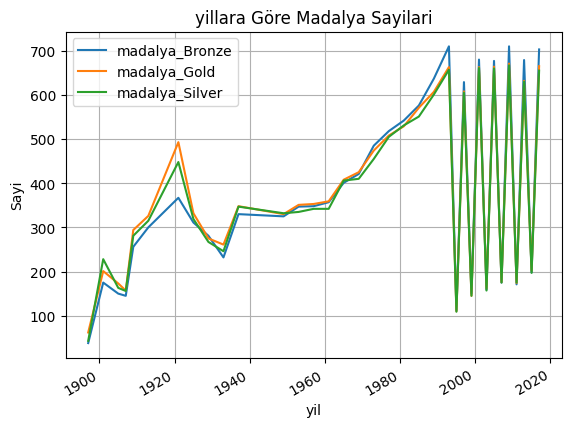

In [95]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("yillara Göre Madalya Sayilari")
plt.ylabel("Sayi")
plt.xlabel("yil")
plt.grid(True)
plt.show()

# Yillara ve Sezona Göre Madalya Sayilari

In [100]:
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head()
yaz.head()

,Name,Gender,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,True,False,False
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,True,False,False
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,False,True,False


In [101]:
periyodik_Veri_Kis = kis.resample("A").sum()
periyodik_Veri_Kis = periyodik_Veri_Kis[~(periyodik_Veri_Kis == 0).any(axis=1)]
periyodik_Veri_Kis.head()

,Name,Gender,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1924-12-31,Clarence John AbelJohan Petter hln (Andersson-...,MMMMMMMMMMMMMMMFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMM...,3919.60,22867.28,9703.58,United StatesSwedenGreat BritainFranceGreat Br...,USASWEGBRFRAGBRSUIAUTFRAAUTNORFINGBRGBRGBRFRAF...,WinterWinterWinterWinterWinterWinterWinterWint...,ChamonixChamonixChamonixChamonixChamonixChamon...,Ice HockeyCurlingIce HockeyCurlingBobsleighMil...,Ice Hockey Men's Ice HockeyCurling Men's Curli...,37,55,38
1928-12-31,Karl Gustaf Emanuel AbrahamssonAlf Steen Ander...,MMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMM...,2265.56,15745.75,6862.50,SwedenNorwaySwedenSwitzerlandSwitzerlandNorway...,SWENORSWESUISUINORNORSWEAUTSUIFRAFRAAUTAUTTCHC...,WinterWinterWinterWinterWinterWinterWinterWint...,Sankt MoritzSankt MoritzSankt MoritzSankt Mori...,Ice HockeySki JumpingCross Country SkiingIce H...,Ice Hockey Men's Ice HockeySki Jumping Men's N...,31,30,28
1932-12-31,"Osborne ""Ty"" AndersonSherwin Campbell BadgerRu...",MMMMMMMFMFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMM...,2431.00,16357.71,7067.76,United StatesUnited States-1GermanyNorwayNorwa...,USAUSAGERNORNORUSAFRAFRAUSAAUTSUIUSACANUSACANC...,WinterWinterWinterWinterWinterWinterWinterWint...,Lake PlacidLake PlacidLake PlacidLake PlacidLa...,Ice HockeyFigure SkatingIce HockeySpeed Skatin...,Ice Hockey Men's Ice HockeyFigure Skating Mixe...,28,32,32
1936-12-31,Hans Aichelemile AllaisReidar AndersenAlexande...,MMMMMMMMMMMMMMMMMMMMMMMMFMFMMMMMMMMMMMMMMMFMMM...,2742.00,19123.20,8101.88,Switzerland-1FranceNorwayGreat BritainGermanyG...,SUIFRANORGBRGERGERNORNORNORNORSUISUISWEGBRSUIG...,WinterWinterWinterWinterWinterWinterWinterWint...,Garmisch-PartenkirchenGarmisch-PartenkirchenGa...,BobsleighAlpine SkiingSki JumpingIce HockeyFig...,Bobsleigh Men's FourAlpine Skiing Men's Combin...,35,36,37
1948-12-31,Jeannette Eleanor Altwegg (-Wirz)Hans Bnninger...,FMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMM...,3643.00,23942.51,10375.92,Great BritainSwitzerlandUnited StatesBelgiumIt...,GBRSUIUSABELITAUSASUISUITCHTCHUSANORUSASUISUIF...,WinterWinterWinterWinterWinterWinterWinterWint...,Sankt MoritzSankt MoritzSankt MoritzSankt Mori...,Figure SkatingIce HockeySpeed SkatingFigure Sk...,Figure Skating Women's SinglesIce Hockey Men's...,46,41,48


In [102]:
periyodik_Veri_Yaz = yaz.resample("A").sum()
periyodik_Veri_Yaz = periyodik_Veri_Yaz[~(periyodik_Veri_Yaz == 0).any(axis=1)]
periyodik_Veri_Yaz.head(3)

,Name,Gender,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1896-12-31,Ioannis AndreouNikolaos AndriakopoulosEdward B...,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,3418.52,24922.09,10400.97,GreeceGreeceGreat BritainUnited StatesGermanyG...,GREGREGBRUSAGERGERGBRGBRUSAUSAFRAGREGREUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,AthinaAthinaAthinaAthinaAthinaAthinaAthinaAthi...,SwimmingGymnasticsCyclingAthleticsGymnasticsGy...,"Swimming Men's 1,200 metres FreestyleGymnastic...",38,62,43
1900-12-31,Edgar Lindenau AabyeMargaret Ives Abbott (-Dun...,MFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,16783.16,107440.91,45287.89,Denmark/SwedenUnited StatesVesper Boat ClubUni...,DENUSAUSAFRAFRAFRAFRAFRAGERGERNORGBRFRAGBRFRAF...,SummerSummerSummerSummerSummerSummerSummerSumm...,ParisParisParisParisParisParisParisParisParisP...,Tug-Of-WarGolfRowingRugbyRugbySailingSailingFo...,Tug-Of-War Men's Tug-Of-WarGolf Women's Indivi...,175,201,228
1904-12-31,"Louis Grenville ""Lou"" AbellEdgar Holmes AdamsA...",MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,12812.84,86139.17,36124.78,Vesper Boat ClubUnited StatesMohawk Indians-2M...,USAUSACANUSAUSAUSAUSAUSACANUSAUSAUSAUSAUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,St. LouisSt. LouisSt. LouisSt. LouisSt. LouisS...,RowingSwimmingLacrosseRowingCyclingCyclingRowi...,Rowing Men's Coxed EightsSwimming Men's Plunge...,150,173,163


<Figure size 640x480 with 0 Axes>

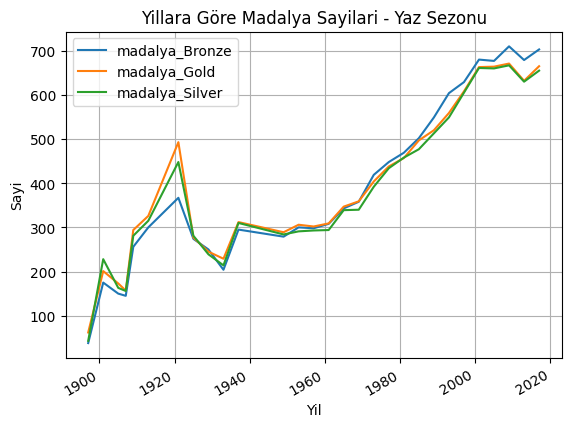

<Figure size 640x480 with 0 Axes>

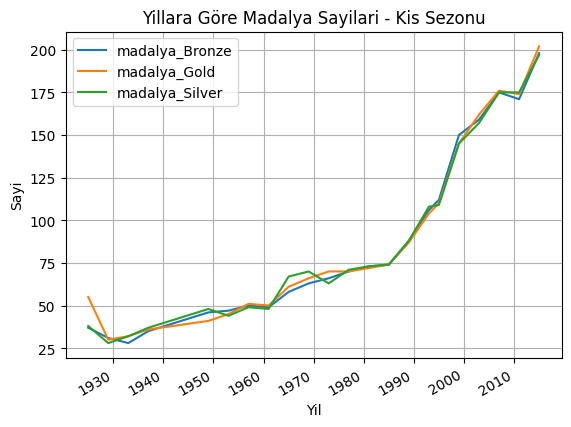

In [115]:
plt.figure()
periyodik_Veri_Yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yillara Göre Madalya Sayilari - Yaz Sezonu")
plt.ylabel("Sayi")
plt.xlabel("Yil")
plt.grid(True)
plt.show()

plt.figure()
periyodik_Veri_Kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yillara Göre Madalya Sayilari - Kis Sezonu")
plt.ylabel("Sayi")
plt.xlabel("Yil")
plt.grid(True)
plt.show()
